## Importing the library

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso

In [78]:
data=pd.read_csv("/content/insurance.csv")

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Exploration

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [82]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Handling the outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1d9c374e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1d9f827c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1d9c374890>],
 'medians': [<matplotlib.lines.Line2D at 0x7c1d9c194d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c1d9c1955d0>],
 'means': []}

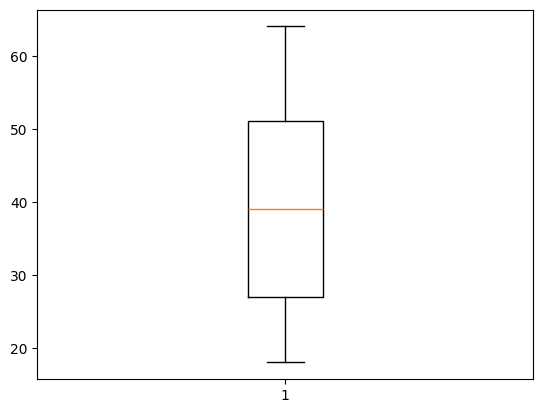

In [83]:
plt.boxplot(data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1d9c217c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1d9c221010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1d9c375b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c1d9c598390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c1d9c59b310>],
 'means': []}

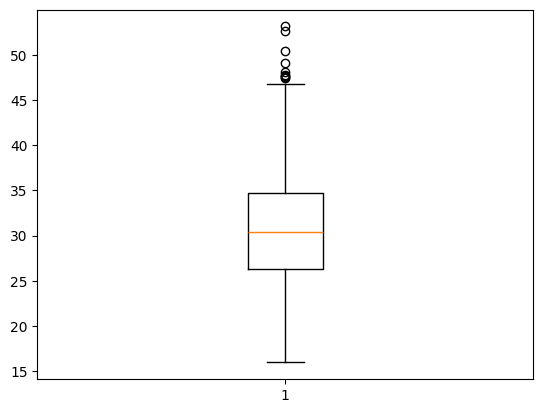

In [84]:
plt.boxplot(data['bmi'])

In [85]:
data[data['bmi']>50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


<Axes: ylabel='children'>

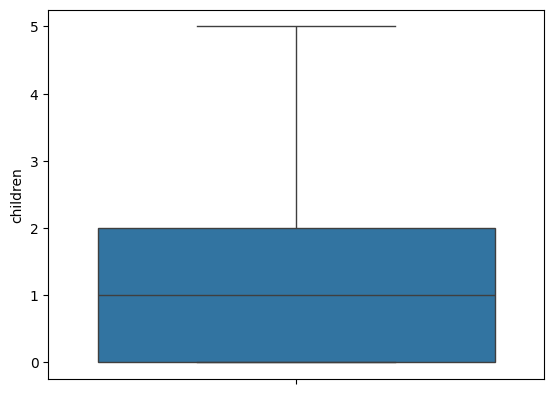

In [86]:
sns.boxplot(data['children'])

<Axes: ylabel='charges'>

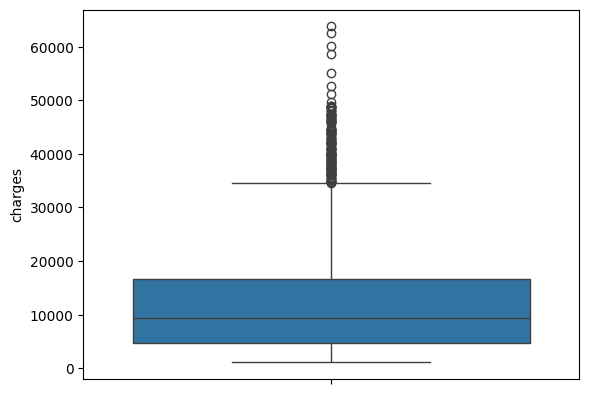

In [87]:
sns.boxplot(data['charges'])

In [88]:
data[data['charges']>60000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [89]:
data[data['bmi']>50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [90]:
data.shape

(1338, 7)

In [91]:
data=data.drop(index=[543,1230,1300])

In [92]:
data=data.drop(index=[847,1047,1317])

In [93]:
data[data['bmi']>50]

,age,sex,bmi,children,smoker,region,charges


In [94]:
data[data['charges']>60000]

,age,sex,bmi,children,smoker,region,charges


##One Hot Encoding for the categorical variables

In [95]:
labelencoder=LabelEncoder()
data['region']=labelencoder.fit_transform(data['region'])

In [96]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,1,10600.54830
1334,18,female,31.920,0,no,0,2205.98080
1335,18,female,36.850,0,no,2,1629.83350
1336,21,female,25.800,0,no,3,2007.94500


In [97]:
data["sex"]=data['sex'].map({'female':0,"male":1})

In [98]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


In [99]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [100]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


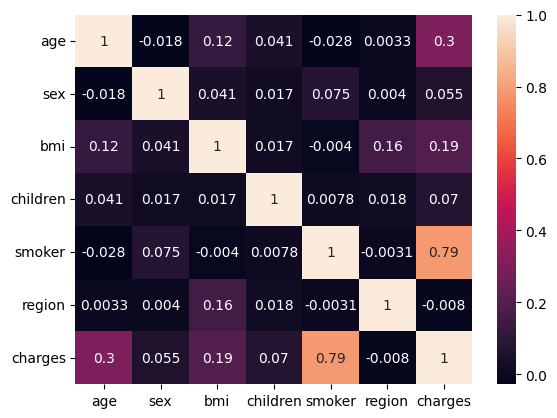

In [101]:
cor_matrix=data.corr()
sns.heatmap(cor_matrix, annot=True)
plt.show()

##Splitting the data

In [102]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [103]:
x=data.iloc[:,:-1]

In [104]:
y=data.iloc[:,-1:]

In [105]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=13)

In [106]:
x_train

,age,sex,bmi,children,smoker,region
726,41,1,28.405,1,0,1
1190,31,0,32.775,2,0,1
1133,52,0,18.335,0,0,1
1240,52,1,41.800,2,1,2
551,32,0,28.930,0,0,2
...,...,...,...,...,...,...
868,61,1,23.655,0,0,0
743,31,0,26.620,0,0,2
74,44,1,27.400,2,0,3
176,38,1,27.835,2,0,1


In [107]:
y_test

,charges
1229,11938.25595
893,44202.65360
49,38709.17600
1215,12890.05765
321,24671.66334
...,...
392,8964.06055
1034,12950.07120
524,38245.59327
832,4719.73655


# Model creation

In [108]:
model=LinearRegression()

In [109]:
model.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred=model.predict(x_test)

In [122]:
mse=mean_squared_error(y_test, y_pred)
print(f"MSE:",mse)

MSE: 32206014.467874613


In [126]:
r2=r2_score(y_test,y_pred)
print(f"R2:-",r2)

R2:- 0.7389967766219737


In [114]:
mae=mean_absolute_error(y_test,y_pred)
mae

4051.534868216865

## Using Polynomial Feature

In [116]:
poly=PolynomialFeatures()
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [117]:
model2=LinearRegression()
model2.fit(x_train_poly, y_train)

LinearRegression()

In [118]:
y_pred_2=model2.predict(x_test_poly)

In [123]:
mse=mean_squared_error(y_test,y_pred_2)
print(f"MSE:",mse)

MSE: 18286617.162918683


In [125]:
r2=r2_score(y_test,y_pred_2)
print(f"R2:-",r2)

R2:- 0.8518020281906464


In [128]:
mae=mean_absolute_error(y_test,y_pred_2)
print(f"MAE :-",mae)

MAE :- 2693.217424164077


## Using L1, L2 tech

In [130]:
ridge=Ridge(alpha=1.5)
ridge.fit(x_train,y_train)

Ridge(alpha=1.5)

In [131]:
ridge_predict=ridge.predict(x_test)

In [132]:
mean_squared_error(y_test,ridge_predict)

32129932.341537893

In [133]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [134]:
lasso_predict=lasso.predict(x_test)

In [135]:
mean_squared_error(y_test,lasso_predict)

32205743.074921105

## Another way

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [138]:
model4=Pipeline([
    ('Polynomial_feature', PolynomialFeatures(degree=2)),
    ("Standard scalar", StandardScaler()),
    ("ridge_regression", Ridge())
])

In [139]:
model4.fit(x_train,y_train)

Pipeline(steps=[('Polynomial_feature', PolynomialFeatures()),
                ('Standard scalar', StandardScaler()),
                ('ridge_regression', Ridge())])

In [140]:
y_pred_4=model4.predict(x_test)

In [141]:
mse=mean_squared_error(y_test,y_pred_4)
print(f"MSE:",mse)

MSE: 18281065.29258571


In [142]:
r2=r2_score(y_test,y_pred_4)
print(f"R2:-",r2)

R2:- 0.8518470215273454


In [143]:
mae=mean_absolute_error(y_test,y_pred_4)
print(f"MAE :-",mae)

MAE :- 2690.53166020205
